<a href="https://colab.research.google.com/github/itznotpk/Smart-Health-Monitoring/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Set Up the Notebook and Import Libraries**

Import libraries for:


*   data handling (Pandas, NumPy)
*   preprocessing (StandardScaler)
*   evaluation/visualization (Scikit-learn, Matplotlib, Seaborn)

This sets up the environment. Run this first to ensure all dependencies are ready.

Colab has these pre-installed, but the GPU will speed up neural network training.

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

print("Libraries imported successfully!")

Libraries imported successfully!


**Step 2: Upload Your Dataset**

Upload your CSV dataset manually.


1.   Click "Choose Files" when prompted and select your file (e.g., diabetes_dataset.csv). This loads it into a DataFrame.
2.   Check the output (df.head()) to ensure correct loading. If your CSV has different column names, you’ll adjust them in later steps.

In [5]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

print("Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv
Dataset loaded successfully!
Shape: (100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['hypertension'].plot(kind='hist', bins=20, title='hypertension')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['heart_disease'].plot(kind='hist', bins=20, title='heart_disease')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('smoking_history').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='age', y='hypertension', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='hypertension', y='heart_disease', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='heart_disease', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='bmi', y='HbA1c_level', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hypertension']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('hypertension', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hypertension')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hypertension']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('hypertension', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('smoking_history')):
  _plot_series(series, series_name, i)
  fig.legend(title='smoking_history', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hypertension')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hypertension']
  ys = series['heart_disease']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('hypertension', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hypertension')
_ = plt.ylabel('heart_disease')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hypertension']
  ys = series['heart_disease']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('hypertension', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('smoking_history')):
  _plot_series(series, series_name, i)
  fig.legend(title='smoking_history', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hypertension')
_ = plt.ylabel('heart_disease')

from matplotlib import pyplot as plt
_df_14['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['hypertension'].plot(kind='line', figsize=(8, 4), title='hypertension')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['heart_disease'].plot(kind='line', figsize=(8, 4), title='heart_disease')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['smoking_history'].value_counts()
    for x_label, grp in _df_18.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('smoking_history')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='age', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['smoking_history'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='age', y='smoking_history', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='hypertension', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['smoking_history'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='hypertension', y='smoking_history', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Step 3: Explore the Dataset**

Inspect the data to check for missing values, data types, and class distribution.

This helps identify issues (e.g., NaNs, imbalanced classes) before training.

The heatmap visualizes missing data.

Adjust the 'Label' column name if your target column is different.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

Summary Statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.

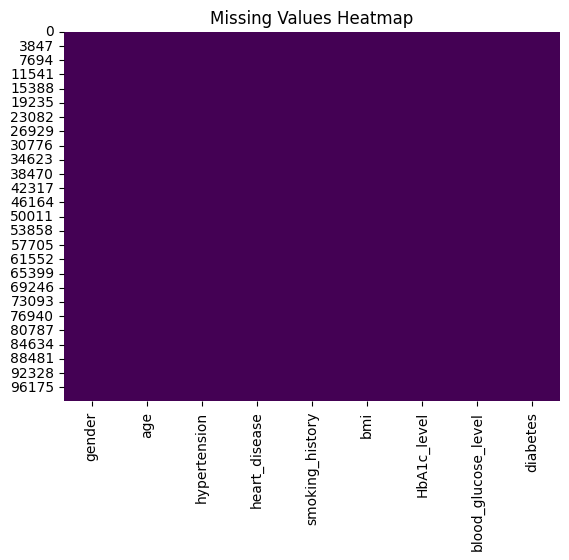

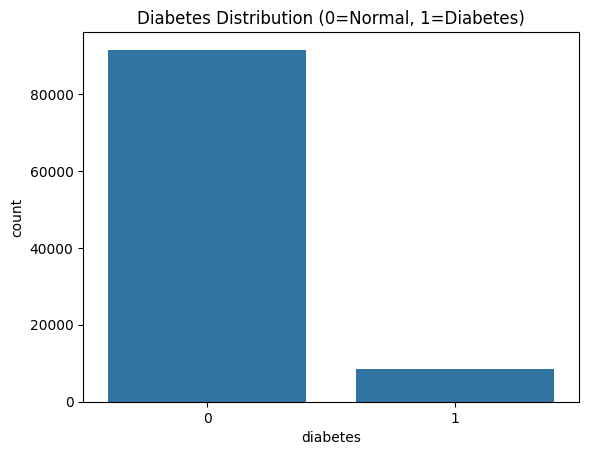

In [6]:
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nTarget Distribution (diabetes):")
print(df['diabetes'].value_counts(normalize=True))

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Visualize target distribution
sns.countplot(x='diabetes', data=df)
plt.title("Diabetes Distribution (0=Normal, 1=Diabetes)")
plt.show()

**Step 4: Preprocess the Data**


Handle missing values (fill with mean for numerical columns)

Separate features (X) from the target (y), and scale features using StandardScaler.

Neural networks are sensitive to unscaled data, so scaling is critical.

Adjust 'Label' if your target column has a different name.

In [7]:
# Handle missing values
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df['HbA1c_level'].fillna(df['HbA1c_level'].median(), inplace=True)
df['blood_glucose_level'].fillna(df['blood_glucose_level'].median(), inplace=True)
df['smoking_history'].fillna(df['smoking_history'].mode()[0], inplace=True)

# Define features
categorical_features = ['gender', 'smoking_history']
numerical_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

print("Data preprocessed successfully!")
print("Shape of X:", X_preprocessed.shape)
print("Feature names:", np.concatenate([numerical_features, preprocessor.named_transformers_['cat'].get_feature_names_out()]))

/tmp/ipython-input-1944564680.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)
/tmp/ipython-input-1944564680.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Data preprocessed successfully!
Shape of X: (100000, 12)
Feature names: ['age' 'hypertension' 'heart_disease' 'bmi' 'HbA1c_level'
 'blood_glucose_level' 'gender_Male' 'gender_Other'
 'smoking_history_current' 'smoking_history_former'
 'smoking_history_never' 'smoking_history_not current']


**Step 5: Split the Data into Train and Test Sets**


Split data into 80% training and 20% testing sets.

This evaluates the model on unseen data.

The random state ensures reproducibility. Run after preprocessing.

In [8]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Data split and resampled successfully!")
print("Original train distribution:", np.bincount(y_train))
print("Resampled train distribution:", np.bincount(y_train_resampled))
print("Test set size:", X_test.shape[0])

Data split and resampled successfully!
Original train distribution: [73200  6800]
Resampled train distribution: [73200 73200]
Test set size: 20000


**Step 6: Build and Train the Keras Neural Network**


Define a simple neural network with:

*   2 hidden layers (64 and 32 neurons, ReLU activation)
*   1 output layer with softmax for multi-class classification (e.g., Normal/Prediabetes/Diabetes)

 Use dropout to prevent overfitting.

 Train with Adam optimizer and early stopping to optimize accuracy.

 The GPU in Colab speeds this up.

 Adjust the output layer’s units (e.g., 3 for 3 classes) based on your 'Label' values.

In [9]:
# Define input shape based on preprocessed features
input_shape = X_train_resampled.shape[1]

# Build the ANN (adjusted for binary classification)
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),  # Input + 1st hidden
    Dropout(0.3),  # Prevent overfitting
    Dense(32, activation='relu'),  # 2nd hidden
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile with binary crossentropy
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train
history = model.fit(X_train_resampled, y_train_resampled,
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=16,
                    callbacks=[early_stop],
                    verbose=1)

print("Model trained successfully!")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9150/9150 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.8812 - loss: 0.2544 - val_accuracy: 0.8885 - val_loss: 0.2017
Epoch 2/50
9150/9150 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9060 - loss: 0.1927 - val_accuracy: 0.8959 - val_loss: 0.1849
Epoch 3/50
9150/9150 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9099 - loss: 0.1837 - val_accuracy: 0.8877 - val_loss: 0.1915
Epoch 4/50
9150/9150 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9127 - loss: 0.1805 - val_accuracy: 0.8845 - val_loss: 0.2054
Epoch 5/50
9150/9150 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9139 - loss: 0.1772 - val_accuracy: 0.8895 - val_loss: 0.1970
Epoch 6/50
9150/9150 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9133 - loss: 0.1791 - val_accuracy: 0.9010 - val_loss: 0.1769
Epoch 7/50
9150/9150 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9140 - loss: 0.1759 - val_accuracy: 0.8918 - val_loss: 0.1862
Epoch 8/50
9150/9150 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9146 - loss: 0

**Step 7: Evaluate the Model**


Normalized Confusion Matrix:

What: A heatmap showing the proportion of correct and incorrect predictions for Normal (0) and Diabetes (1).

Details: Normalized (values 0-1) to highlight misclassification rates (e.g., false negatives for diabetes). Labeled axes as "Normal" and "Diabetes" for clarity.

Purpose: Assesses model accuracy, especially for the critical Diabetes class, ensuring dominant features (e.g., HbA1c_level) drive correct predictions.


ROC Curve:

What: A plot of True Positive Rate (TPR) vs. False Positive Rate (FPR) at various thresholds.

Details: Includes the Area Under the Curve (AUC, 0-1) to quantify overall binary classification performance. A diagonal line (AUC=0.5) shows random guessing.

Purpose: Evaluates how well the model distinguishes Normal from Diabetes, with high AUC indicating strong reliance on key features like HbA1c_level.


Precision-Recall Curve:

What: A plot of Precision vs. Recall for the Diabetes class (1).

Details: Shows Area Under the Curve (PR-AUC) to assess performance on the minority class (Diabetes), crucial for imbalanced datasets.

Purpose: Ensures the model effectively identifies Diabetes cases, complementing ROC-AUC for feature-driven predictions.


Feature Importance Bar Plot:

What: A horizontal bar plot of permutation importance scores for top 8 features (e.g., HbA1c_level, blood_glucose_level, gender_Male).

Details: Quantifies each feature’s impact on ROC-AUC by shuffling values. Higher scores indicate dominant predictors.

Purpose: Confirms which features (likely HbA1c_level, blood_glucose_level) drive accurate diabetes predictions, aiding Flask app explanations.

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 90.84%
ROC-AUC Score: 97.67%
Precision-Recall AUC: 87.82%

Classification Report:
              precision    recall  f1-score   support

  Normal (0)       0.99      0.91      0.95     18300
Diabetes (1)       0.48      0.91      0.63      1700

    accuracy                           0.91     20000
   macro avg       0.74      0.91      0.79     20000
weighted avg       0.95      0.91      0.92     20000



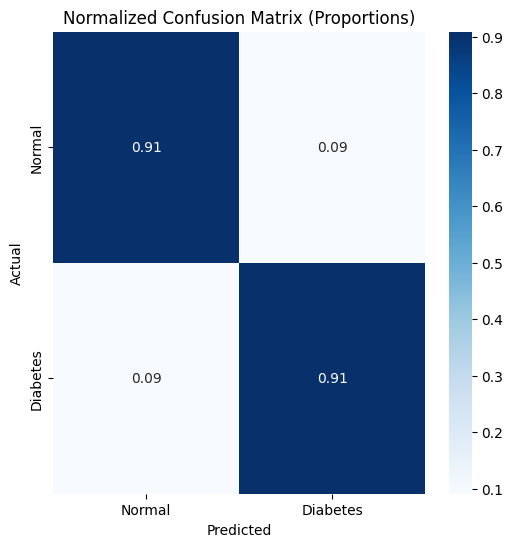

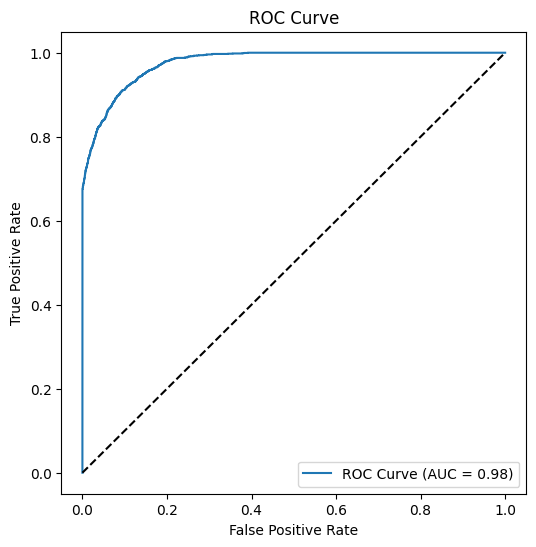

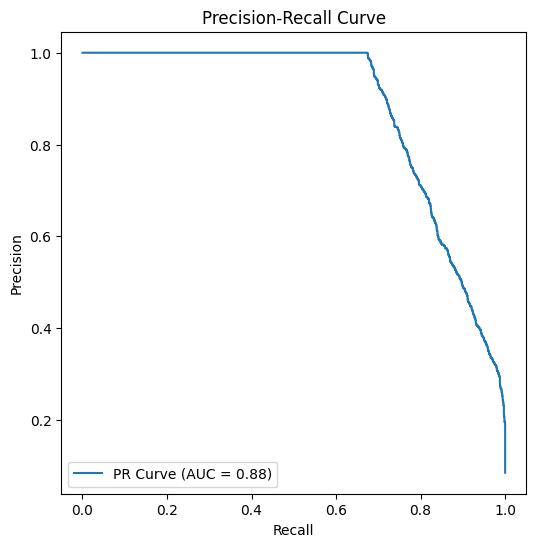

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━

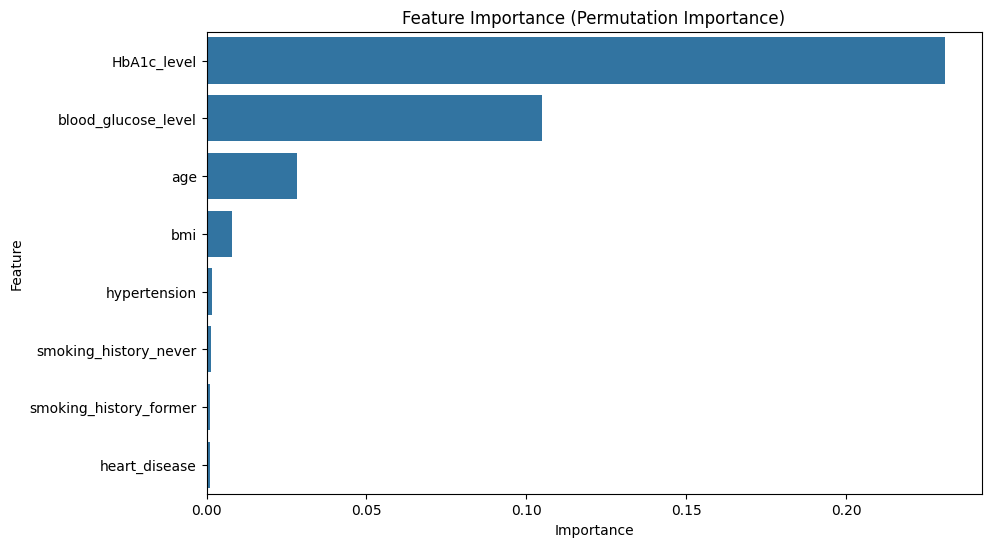

Top 5 Dominant Features:
             Feature  Importance
        HbA1c_level    0.230700
blood_glucose_level    0.104993
                age    0.028369
                bmi    0.007970
       hypertension    0.001572

Explainability: The model relies heavily on 'HbA1c_level' (importance: 0.231). For example, high HbA1c_level values increase diabetes risk predictions.


In [12]:
# Step 7: Evaluate the Model
from sklearn.metrics import precision_recall_curve, auc
from sklearn.inspection import permutation_importance

# Predict on test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()  # Binary threshold at 0.5

# Core Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"ROC-AUC Score: {roc_auc * 100:.2f}%")

# Precision-Recall Curve (better for imbalanced data)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal (0)', 'Diabetes (1)']))

# Normalized Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')  # Proportions
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Normal', 'Diabetes'], yticklabels=['Normal', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Proportions)')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Permutation Importance to assess dominant features
# Use a wrapper to compute importance on preprocessed data
def predict_wrapper(X):
    return model.predict(X).flatten()

perm_importance = permutation_importance(predict_wrapper, X_test, y_test,
                                        n_repeats=10, random_state=42, scoring='roc_auc')
feature_names = np.concatenate([numerical_features,
                                preprocessor.named_transformers_['cat'].get_feature_names_out()])

# Plot feature importance
perm_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_df.head(8))
plt.title('Feature Importance (Permutation Importance)')
plt.show()
print("Top 5 Dominant Features:\n", perm_df.head().to_string(index=False))

# Sample explanation for Flask
top_feature = perm_df.iloc[0]['Feature']
top_importance = perm_df.iloc[0]['Importance']
print(f"\nExplainability: The model relies heavily on '{top_feature}' (importance: {top_importance:.3f}). "
      f"For example, high {top_feature} values increase diabetes risk predictions.")

**Step 8: Visualize Training Progress**

Dual-Axis Training Progress Plot:

A single figure with two y-axes: Accuracy (left, blue/cyan) and Loss (right, red/orange) over epochs.

Plots Train Accuracy (blue), Validation Accuracy (cyan), Train Loss (red), and Validation Loss (orange). Legends clarify each line.

Checks for overfitting (diverging validation loss) or underfitting (low accuracy). Converging lines suggest robust learning of dominant features like HbA1c_level.

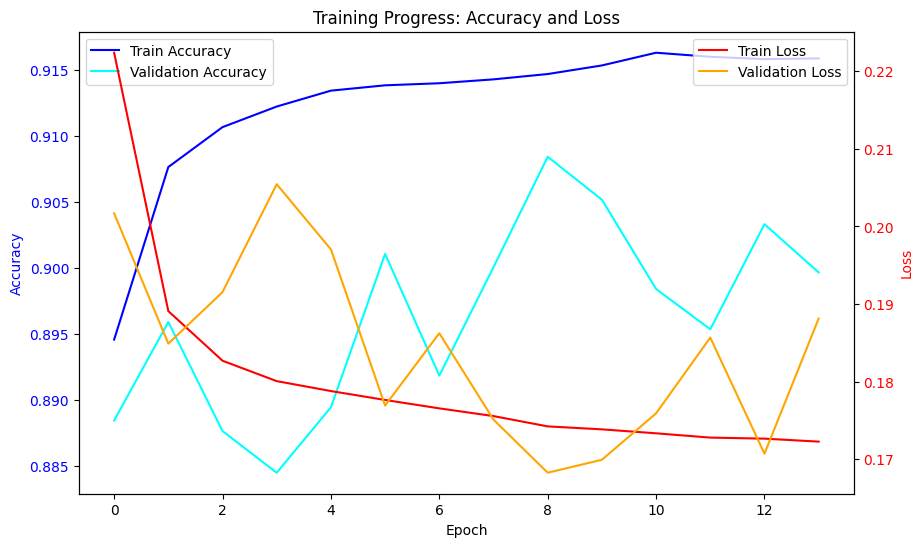


Training Diagnostics:
Converging lines (Val Accuracy: 0.900, Val Loss: 0.188) suggest robust learning. Dominant features like HbA1c_level and blood_glucose_level are likely well-captured.


In [15]:
# Step 8: Visualize Training Progress
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracy on primary y-axis
ax1.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Training Progress: Accuracy and Loss')
ax1.legend(loc='upper left')

# Plot loss on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(history.history['loss'], label='Train Loss', color='red')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax2.set_ylabel('Loss', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.show()

# Diagnostic commentary
val_acc_final = history.history['val_accuracy'][-1]
val_loss_final = history.history['val_loss'][-1]
acc_gap = abs(history.history['accuracy'][-1] - val_acc_final)
loss_gap = abs(history.history['loss'][-1] - val_loss_final)

print("\nTraining Diagnostics:")
if acc_gap < 0.05 and loss_gap < 0.1:
    print(f"Converging lines (Val Accuracy: {val_acc_final:.3f}, Val Loss: {val_loss_final:.3f}) "
          f"suggest robust learning. Dominant features like HbA1c_level and blood_glucose_level "
          f"are likely well-captured.")
elif loss_gap > 0.2:
    print(f"Diverging validation loss (Val Loss: {val_loss_final:.3f}) indicates potential overfitting. "
          f"Consider increasing dropout (current: 0.3) or reducing model complexity.")
else:
    print(f"Moderate divergence (Acc gap: {acc_gap:.3f}, Loss gap: {loss_gap:.3f}). "
          f"Model learned key features but may benefit from more data or tuning.")

**Step 9: Save the Model and Scaler**

Save the trained model and scaler for use in your Flask app.

Download both files (nn_model.h5 and scaler.joblib) to place in the same folder as main.py.

These enable predictions on PDF-extracted data.

In [16]:
# Save Keras model
model.save('diabetes_ann_model.h5')

# Save preprocessor
joblib.dump(preprocessor, 'preprocessor.joblib')

# Download files
files.download('diabetes_ann_model.h5')
files.download('preprocessor.joblib')

print("Model and preprocessor saved and ready for download!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model and preprocessor saved and ready for download!


**Step 10: (Optional) Make a Sample Prediction**

Test the model with a sample input (e.g., glucose=120, HbA1c=6.0).

Adjust the input array to match your feature columns.

This simulates Flask app predictions.

The output probability reflects how dominant parameters influence the result.

In [7]:
sample_df = pd.DataFrame({
    'gender': ['Female'],
    'age': [50],
    'hypertension': [0],
    'heart_disease': [0],
    'smoking_history': ['never'],
    'bmi': [27.32],
    'HbA1c_level': [6.0],
    'blood_glucose_level': [100]
})

# Preprocess sample
sample_preprocessed = preprocessor.transform(sample_df)

# Predict
sample_pred_proba = model.predict(sample_preprocessed)
sample_pred = (sample_pred_proba > 0.5).astype(int)[0]
prob = sample_pred_proba[0][0] * 100
risk = "Diabetes" if sample_pred == 1 else "Normal"

print(f"Sample Prediction: {risk} (Probability of Diabetes: {prob:.1f}%)")
print("Recommendation: If >50%, consult a doctor!")

NameError: name 'pd' is not defined